In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,
r2_score, mean_absolute_error, mean_squared_error


In [ ]:
### TÌM CÁC NHÂN TỐ ẢNH HƯỞNG TỚI ĐẦU RA C02 

In [3]:
df=pd.read_csv('FuelConsumptionCo2.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [4]:
df.shape

(1067, 13)

In [5]:
df.columns


Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

y = a[x1, x2, x3, x4] + b
# X: if independent variable, predictor
# Y: dependent variable, target

X1, X2 correlated: colinearity nếu 2 biến tương quan với nhau cỡ 0.9 cùng 

In [7]:
df.FUELTYPE.unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

### Cleaning

In [10]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [11]:
df.duplicated().sum()

0

### Explore

In [13]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [17]:
columns = ['ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY','CO2EMISSIONS']
new_df = df[columns].copy()

In [18]:
new_df.head(2)

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,AS5,Z,9.9,196
1,2.4,4,M6,Z,11.2,221


In [19]:
new_df.TRANSMISSION.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

In [20]:
new_df.groupby('TRANSMISSION').CO2EMISSIONS.mean()

TRANSMISSION
A4     329.022222
A5     298.900000
A6     263.054054
A7     314.000000
A8     265.643678
A9     242.625000
AM5    147.000000
AM6    232.833333
AM7    267.852941
AS4    228.000000
AS5    261.100000
AS6    249.666667
AS7    274.210526
AS8    290.212500
AS9    225.000000
AV     183.565217
AV6    193.272727
AV7    160.200000
AV8    213.000000
M5     199.354167
M6     235.716312
M7     251.000000
Name: CO2EMISSIONS, dtype: float64

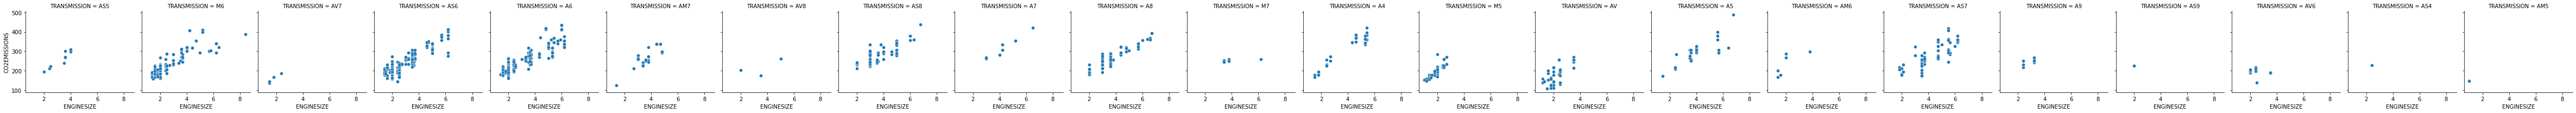

In [22]:
g = sns.FacetGrid(data=new_df, col='TRANSMISSION')
g.map(sns.scatterplot, 'ENGINESIZE', 'CO2EMISSIONS');

In [23]:
#### KO CÓ ẢNH HƯỞNG GÌ HỚT -.- 

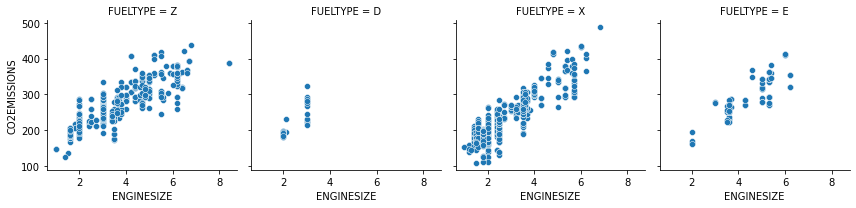

In [25]:
g = sns.FacetGrid(data=new_df, col='FUELTYPE')
g.map(sns.scatterplot, 'ENGINESIZE', 'CO2EMISSIONS');

In [26]:
columns = ['ENGINESIZE', 'CYLINDERS',
        'FUELCONSUMPTION_CITY','CO2EMISSIONS']
new_df = df[columns].copy()

In [27]:
new_df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.898039
CO2EMISSIONS,0.874154,0.849685,0.898039,1.000000


In [29]:
np.std(np.ones(shape=(1000, 1)))

0.0

In [30]:
one = np.ones(1000)
one[1] = 100

In [33]:
np.std(one)

3.1290891645972634

In [38]:
mij = 1 if i=j

SyntaxError: invalid syntax (<ipython-input-38-456ca2d51ee6>, line 1)

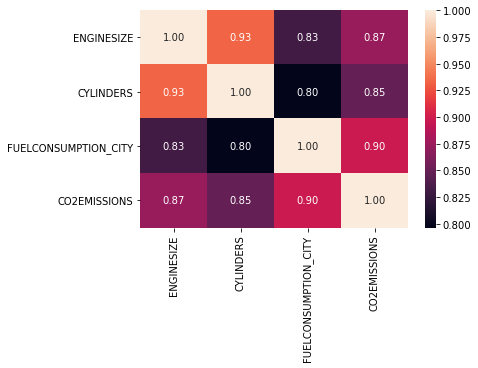

In [37]:
sns.heatmap(new_df.corr(), fmt='.2f', annot=True);
## vẽ hệ số tương quan


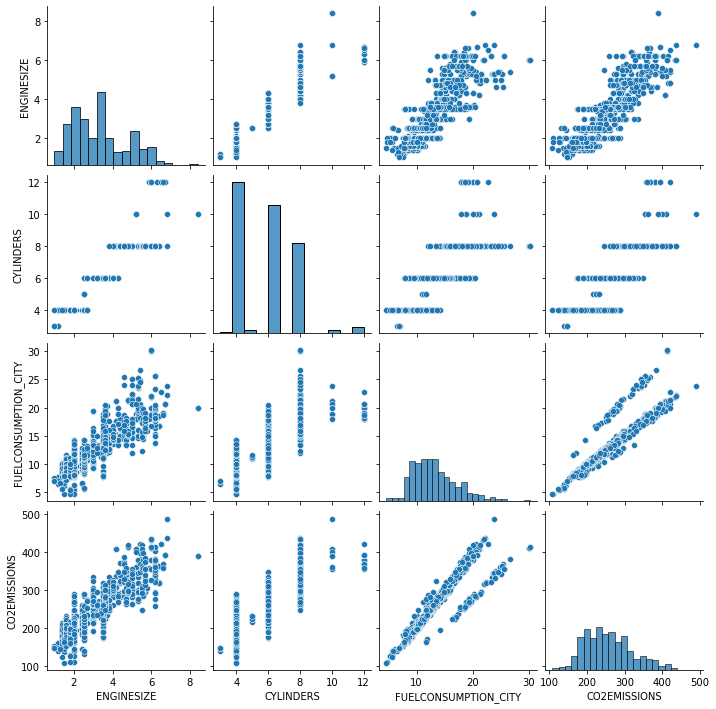

In [39]:
sns.pairplot(data=new_df, );

### Modeling

- parameter: tham số
- hyperparameter: siêu tham số tuning model cho chính xác

y = 3x + 2, y = 3.2x + 2 ---> y = 3.00001x + 2.0000001 (quá trình đưa cái sai về gần 
                                                       sát mô hình gọi là tuning

(0, 2)
(1, 5)
(2, 8)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['FUELCONSUMPTION_CITY']], new_df.CO2EMISSIONS, 
                                                    test_size=0.15, shuffle=True, random_state=4)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [45]:
linear_regression = LinearRegression(normalize=True)
linear_regression.fit(X_train, y_train)

LinearRegression(normalize=True)

In [46]:
y_predicted = linear_regression.predict(X_test)

In [47]:
y_predicted

array([251.70319617, 231.02914653, 246.19011626, 254.45973612,
       279.26859568, 250.32492619, 149.71121795, 191.05931723,
       301.3209153 , 275.13378576, 228.27260658, 257.21627607,
       293.05129544, 248.94665622, 213.11163684, 283.40340561,
       282.02513564, 302.69918527, 410.20424339, 257.21627607,
       258.59454605, 273.75551578, 204.84201699, 254.45973612,
       310.96880513, 210.35509689, 236.54222643, 261.351086  ,
       192.43758721, 215.8681768 , 319.23842498, 225.51606663,
       239.29876638, 197.95066711, 273.75551578, 197.95066711,
       197.95066711, 253.08146614, 306.8339952 , 302.69918527,
       232.40741651, 277.89032571, 261.351086  , 247.56838624,
       320.61669496, 204.84201699, 255.83800609, 228.27260658,
       253.08146614, 279.26859568, 264.10762595, 333.02112474,
       202.08547704, 323.37323491, 305.45572523, 330.26458479,
       207.59855694, 316.48188503, 222.75952667, 218.62471675,
       236.54222643, 213.11163684, 339.91247462, 291.67

In [48]:
## cần biết mô hình có tốt ko thì so sánh y_predict vs y_test

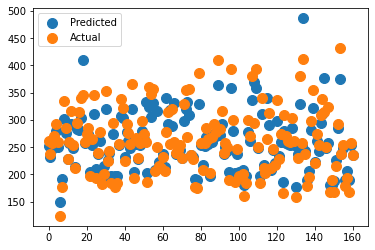

In [56]:
x = np.arange(len(y_predicted))
plt.scatter(x, y_predicted, label = 'Predicted', s=100)
plt.scatter(x, y_test.values, label = 'Actual', s=100)
plt.legend()
plt.show()

In [53]:
pd.options.display.max_rows=50

In [55]:
pd.DataFrame({'predicted': y_predicted, 'actual': y_test}).head(50)

,predicted,actual
834,251.703196,262
66,231.029147,237
983,246.190116,258
849,254.459736,271
110,279.268596,292
994,250.324926,260
1042,149.711218,124
862,191.059317,177
545,301.320915,334
558,275.133786,285


In [57]:
### cần viết ptrinh linear regression

In [59]:
mean_absolute_error(y_test.values, y_predicted)

18.86497259574705

In [61]:
np.sqrt(mean_squared_error(y_test.values, y_predicted))

26.420159507648144

In [63]:
r2_score(y_test.values, y_predicted)*100

# hệ số xác định 

80.78005675807023

### Equation

$$\text{Co2 Emission} = 13.783 * \text{Co2 Emission} + 72.528\ $$

In [66]:
linear_regression.coef_

array([13.78269976])

In [67]:
linear_regression.intercept_

72.52809930666572

In [74]:
for i in X_test.iloc[:3].FUELCONSUMPTION_CITY.values:
    print(linear_regression.coef_[0] * i + linear_regression.intercept_)

251.7031961671665
231.0291465294164
246.19011626376647


array([13. , 11.5, 12.6])

In [73]:
y_predicted[:3]

array([251.70319617, 231.02914653, 246.19011626])

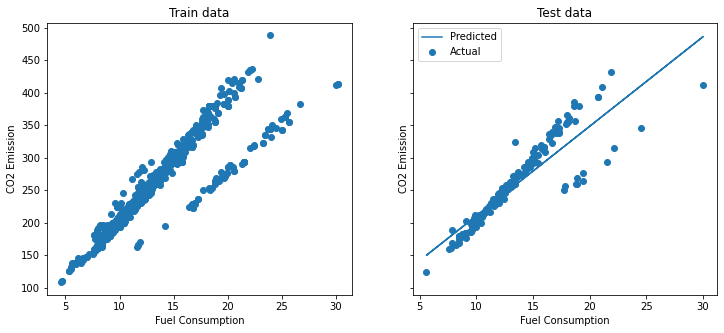

In [92]:
_, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

axes[0].scatter(x=X_train.FUELCONSUMPTION_CITY.values, y=y_train.values)
axes[0].set(title='Train data', xlabel='Fuel Consumption', ylabel='CO2 Emission')


axes[1].scatter(x=X_test.FUELCONSUMPTION_CITY.values, y=y_test.values, label='Actual')
axes[1].plot(X_test.FUELCONSUMPTION_CITY.values, y_predicted, label='Predicted')
axes[1].set(title='Test data', xlabel='Fuel Consumption', ylabel='CO2 Emission')


plt.legend()
plt.show()